Olá, Reinner

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>





<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição

    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Oriento ajustar hiperparâmetros </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>

<div class="alert alert-block alert-info">
<b>Não tiveram observações em vermelho para correção.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Peço desculpas, mas a plataforma não salvou meus comentários. Precisa calibrar hiperparâmetros </div>


<div class="alert alert-block alert-success">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Tudo certo agora. Calibração feita de forma muito elegante: definiu funções para fins de reúso.
Desejo sucesso na jornada.    
</div>


O serviço de vendas de carros usados Rusty Bargain está desenvolvendo um aplicativo para atrair novos clientes. Nesse aplicativo, você pode descobrir rapidamente o valor de mercado do seu carro. Você tem acesso a dados históricos: especificações técnicas, versões de acabamento e preços. Você precisa construir o modelo para determinar o valor. 

Rusty Bargain está interessado em:

- a qualidade da predição;
- a velocidade da predição;
- o tempo necessário para o treinamento

## Importando bibliotecas

In [77]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
from catboost import Pool, CatBoostRegressor
from xgboost import XGBRegressor


## Preparação de Dados

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

In [3]:
print(df.head())

        DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  24/03/2016 11:52    480         NaN              1993  manual      0   
1  24/03/2016 10:58  18300       coupe              2011  manual    190   
2  14/03/2016 12:52   9800         suv              2004    auto    163   
3  17/03/2016 16:54   1500       small              2001  manual     75   
4  31/03/2016 17:25   3600       small              2008  manual     69   

   Model  Mileage  RegistrationMonth  FuelType       Brand NotRepaired  \
0   golf   150000                  0    petrol  volkswagen         NaN   
1    NaN   125000                  5  gasoline        audi         yes   
2  grand   125000                  8  gasoline        jeep         NaN   
3   golf   150000                  6    petrol  volkswagen          no   
4  fabia    90000                  7  gasoline       skoda          no   

        DateCreated  NumberOfPictures  PostalCode          LastSeen  
0  24/03/2016 00:00               

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
#converting column´s names to lower cas
columns = df.columns
new_columns = [col.lower() for col in columns]
df.columns = new_columns


In [6]:
#Converting date columns to datetime format
def datetime_convert(data_frame, column):
    for col in column:
        data_frame[col] = pd.to_datetime(data_frame[col], format='%d/%m/%Y %H:%M')
column = ['datecrawled', 'datecreated', 'lastseen']   
datetime_convert(df, column)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        354369 non-null  datetime64[ns]
 1   price              354369 non-null  int64         
 2   vehicletype        316879 non-null  object        
 3   registrationyear   354369 non-null  int64         
 4   gearbox            334536 non-null  object        
 5   power              354369 non-null  int64         
 6   model              334664 non-null  object        
 7   mileage            354369 non-null  int64         
 8   registrationmonth  354369 non-null  int64         
 9   fueltype           321474 non-null  object        
 10  brand              354369 non-null  object        
 11  notrepaired        283215 non-null  object        
 12  datecreated        354369 non-null  datetime64[ns]
 13  numberofpictures   354369 non-null  int64   

In [7]:
print(df.describe())

               price  registrationyear          power        mileage  \
count  354369.000000     354369.000000  354369.000000  354369.000000   
mean     4416.656776       2004.234448     110.094337  128211.172535   
std      4514.158514         90.227958     189.850405   37905.341530   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1050.000000       1999.000000      69.000000  125000.000000   
50%      2700.000000       2003.000000     105.000000  150000.000000   
75%      6400.000000       2008.000000     143.000000  150000.000000   
max     20000.000000       9999.000000   20000.000000  150000.000000   

       registrationmonth  numberofpictures     postalcode  
count      354369.000000          354369.0  354369.000000  
mean            5.714645               0.0   50508.689087  
std             3.726421               0.0   25783.096248  
min             0.000000               0.0    1067.000000  
25%             3.000000               0.0   30165.

We have some worg values. As `9999` and `1000` in the `registrationyear` and `20000`in the `power`column

In [8]:
print(df[df['registrationyear']>2020].count())

datecrawled          105
price                105
vehicletype            0
registrationyear     105
gearbox               24
power                105
model                 63
mileage              105
registrationmonth    105
fueltype              29
brand                105
notrepaired           14
datecreated          105
numberofpictures     105
postalcode           105
lastseen             105
dtype: int64


We have 105 date wrong values. I´ll delete this value because just represent `0,029%`

In [9]:
#removing year > 2020
df = df[df['registrationyear']<=2020]


In [10]:
print(df[df['registrationyear']<1900].count())

datecrawled          66
price                66
vehicletype           0
registrationyear     66
gearbox               9
power                66
model                33
mileage              66
registrationmonth    66
fueltype             14
brand                66
notrepaired          10
datecreated          66
numberofpictures     66
postalcode           66
lastseen             66
dtype: int64


In [11]:
print(df['registrationyear'].sort_values().head(67))

233631    1000
71459     1000
110123    1000
216770    1000
79120     1000
          ... 
34332     1800
139360    1800
351682    1800
195855    1800
138140    1910
Name: registrationyear, Length: 67, dtype: int64


We have `66` lines under `1910`. I´ll remove them

In [12]:
df = df[df['registrationyear']>1910]

In [13]:
print(df['registrationyear']<1910)

0         False
1         False
2         False
3         False
4         False
          ...  
354364    False
354365    False
354366    False
354367    False
354368    False
Name: registrationyear, Length: 354097, dtype: bool


In [14]:
print(df.isna().mean())

datecrawled          0.000000
price                0.000000
vehicletype          0.105186
registrationyear     0.000000
gearbox              0.055409
power                0.000000
model                0.055259
mileage              0.000000
registrationmonth    0.000000
fueltype             0.092325
brand                0.000000
notrepaired          0.200284
datecreated          0.000000
numberofpictures     0.000000
postalcode           0.000000
lastseen             0.000000
dtype: float64


In [15]:
print(df.nunique())

datecrawled          15466
price                 3731
vehicletype              8
registrationyear        97
gearbox                  2
power                  711
model                  250
mileage                 13
registrationmonth       13
fueltype                 7
brand                   40
notrepaired              2
datecreated            109
numberofpictures         1
postalcode            8143
lastseen             18590
dtype: int64


In [16]:
print(df.describe())

               price  registrationyear          power        mileage  \
count  354097.000000     354097.000000  354097.000000  354097.000000   
mean     4418.820298       2003.111340     110.102610  128287.601985   
std      4514.173537          7.371676     189.547608   37792.988624   
min         0.000000       1915.000000       0.000000    5000.000000   
25%      1050.000000       1999.000000      69.000000  125000.000000   
50%      2700.000000       2003.000000     105.000000  150000.000000   
75%      6400.000000       2008.000000     143.000000  150000.000000   
max     20000.000000       2019.000000   20000.000000  150000.000000   

       registrationmonth  numberofpictures     postalcode  
count      354097.000000          354097.0  354097.000000  
mean            5.718250               0.0   50513.738021  
std             3.724967               0.0   25782.979820  
min             0.000000               0.0    1067.000000  
25%             3.000000               0.0   30165.

We can change `Gearbox` e `NotRepaired` in numerical columns. Classifing with 0 or 1

In [17]:
df['gearbox']= np.where(df['gearbox']=='manual',0,1)
df['notrepaired']=np.where(df['notrepaired']=='no',0,1)
print(df['gearbox'].head())
print(df['notrepaired'].head())


0    0
1    0
2    1
3    0
4    0
Name: gearbox, dtype: int64
0    1
1    1
2    1
3    0
4    0
Name: notrepaired, dtype: int64


In [18]:
print(df.isna().mean().sort_values(ascending=False))

vehicletype          0.105186
fueltype             0.092325
model                0.055259
datecrawled          0.000000
price                0.000000
registrationyear     0.000000
gearbox              0.000000
power                0.000000
mileage              0.000000
registrationmonth    0.000000
brand                0.000000
notrepaired          0.000000
datecreated          0.000000
numberofpictures     0.000000
postalcode           0.000000
lastseen             0.000000
dtype: float64


In [19]:
print(df['vehicletype'].unique())

[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']


Lets change `NaN` values for `other`

In [20]:
df['vehicletype'] = df['vehicletype'].fillna('other')
print(df['vehicletype'].isna().sum())

0


We can remove `numberofpicutres`, because all lines are 0

In [21]:
df = df.drop('numberofpictures', axis=1)

In [22]:
print(df.columns)

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'mileage', 'registrationmonth', 'fueltype', 'brand',
       'notrepaired', 'datecreated', 'postalcode', 'lastseen'],
      dtype='object')


In [23]:
print(df['fueltype'].unique())

['petrol' 'gasoline' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']


Switch `NaN`values for `other`

In [24]:
df['fueltype'] = df['fueltype'].fillna('other')

In [25]:
print(df['fueltype'].isna().sum())

0


In [26]:
print(df['model'].isna().sum())

19567


Switch `NaN`values for `other`

In [27]:
df['model'] = df['model'].fillna('other')

In [28]:
print(df['model'].isna().sum())

0


In [29]:
print(df.isna().mean().sort_values(ascending=False))

datecrawled          0.0
price                0.0
vehicletype          0.0
registrationyear     0.0
gearbox              0.0
power                0.0
model                0.0
mileage              0.0
registrationmonth    0.0
fueltype             0.0
brand                0.0
notrepaired          0.0
datecreated          0.0
postalcode           0.0
lastseen             0.0
dtype: float64


Now we don´t have missing values

## Graphs

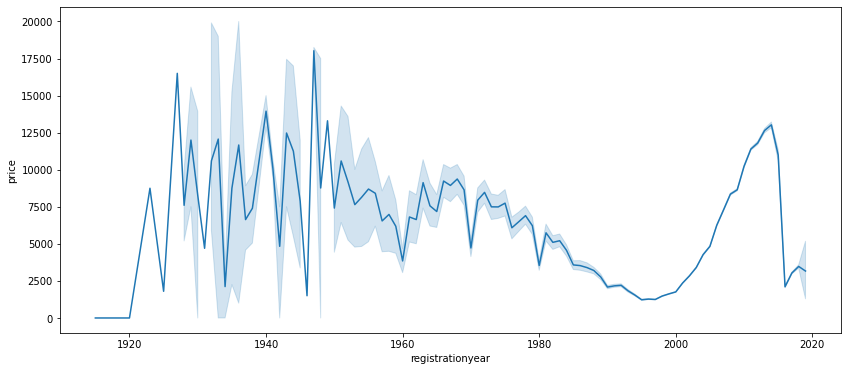

In [30]:
f, ax = plt.subplots(figsize=(14,6))
sns.lineplot(x='registrationyear', y='price', data=df);


We have some high values whith old cars, probably colection´s car and a increase after 2000

Text(0.5, 1.0, 'Price x Mileage')

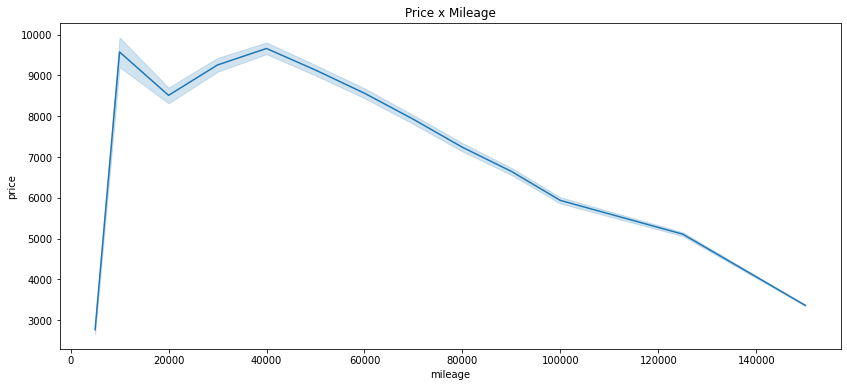

In [31]:
f, ax = plt.subplots(figsize=(14,6))
sns.lineplot(x='mileage', y='price', data=df);
plt.title('Price x Mileage')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Um scatterplot seria mais indicado aqui
</div>

<div class="alert alert-block alert-info">
<b>Já havia testado o scatterplot, mas não achei significativo o mesmo. Segue como ficou.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A meu ver, fica bem significativo. É posível ver que os preços estão bem distribuídos entre os valores min e maximo a aparentemente. É esperado que quanto maior a km menos será o preço.
</div>

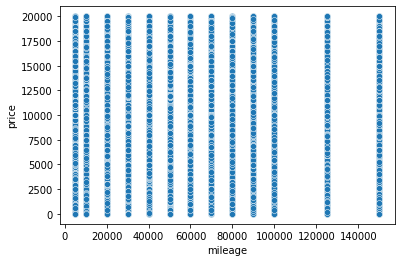

In [32]:
sns.scatterplot(x='mileage', y='price', data=df);

After 40.000 miles, the price of the car has significantly decreased.

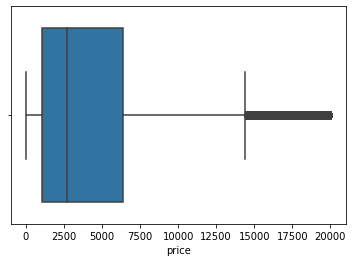

In [33]:
sns.boxplot(x=df['price']);

In [34]:
print((df['price']>15000).value_counts())

False    339220
True      14877
Name: price, dtype: int64


We have a lot of outliers in price column

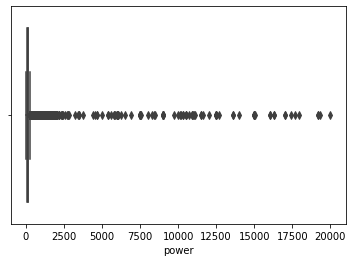

In [35]:
sns.boxplot(x=df['power']);

Text(0.5, 1.0, 'Histogram of power')

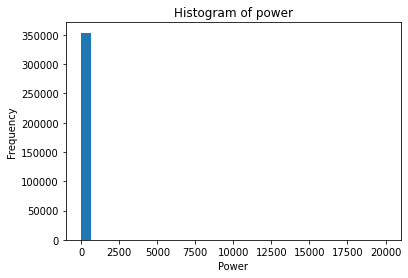

In [36]:
df['power'].plot(kind='hist', bins=30);
plt.xlabel('Power')
plt.title('Histogram of power')

For these cases we will normalize the df

## Feature Engineering

Text(0.5, 1.0, 'Price x Age')

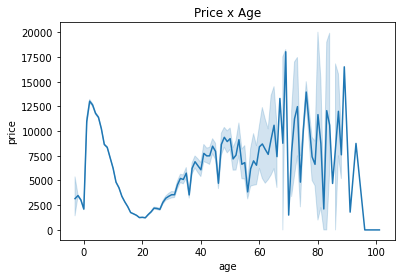

In [37]:
df['age'] = df['datecreated'].dt.year - df['registrationyear']
sns.lineplot(data=df, x='age', y='price');
plt.title('Price x Age')

Car between `70` and `90` years old has higher prices

## Treinamento do modelo

In [38]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [39]:
import category_encoders as ce

In [40]:
#spliting data frame in features and target
y = df['price']
x = df.drop('price', axis=1)

In [41]:
#creating train and test data frames
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12345)

In [42]:
#applying encoding in categorical features
cat_cols = ['vehicletype', 'model', 'fueltype', 'brand' ]
ohe_cols = [x for x in cat_cols if df[x].nunique() < 10 ]
encoding_cols = list(set(cat_cols) - set(ohe_cols))


# at features tha has less than 10 unique values we'll use OneHotEncoder
#the fit process should be at train data frame toa void data leakage
ohe = ce.OneHotEncoder(cols=ohe_cols)
x_train = ohe.fit_transform(x_train)
x_test = ohe.fit_transform(x_test)





In [43]:
#at features tha has more than ten unique values we'll use CatBoosterEncoder, 
#and for that we have to pass the target data frame, so we need to use target train data frame
encoding = ce.CatBoostEncoder(cols=encoding_cols)
encoding.fit(x_train, y_train)
x_train = encoding.transform(x_train)
x_test = encoding.transform(x_test)




For numerical features we have to use MinMaxScaler

In [44]:
numerical_cols = list(set(x_train.columns) - set(cat_cols) - 
                      set(x_train.select_dtypes(include=['datetime64']).columns))
scaler = MinMaxScaler()
scaler.fit(x_train[numerical_cols])

x_train[numerical_cols] = scaler.transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])


In [66]:
x_train = x_train.drop(columns=x_train.select_dtypes(include=['datetime64']).columns)
x_test = x_test.drop(columns=x_test.select_dtypes(include=['datetime64']).columns)

Trainning Linear Model

In [46]:
%%time
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

CPU times: user 378 ms, sys: 137 ms, total: 515 ms
Wall time: 501 ms


Trainning Random Forest Model

In [47]:
%%time
rf = RandomForestRegressor(max_depth=8, n_estimators=100, random_state=12345)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)


CPU times: user 1min 41s, sys: 75.2 ms, total: 1min 41s
Wall time: 1min 41s


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisamos calibrar hiperparâmetros. Oriento ajustar pelo menos n
</div>

Trainning LGBM Model 

In [48]:
%%time
lg = lgbm.LGBMRegressor(random_state=12345)
lg.fit(x_train, y_train)
lg_pred = lg.predict(x_test)

CPU times: user 5.36 s, sys: 24.6 ms, total: 5.39 s
Wall time: 5.37 s


Trainning CatBoost Model

In [49]:
%%time
cb = CatBoostRegressor(learning_rate=0.01, iterations=100, depth=8, loss_function='RMSE', verbose=10)
cb.fit(x_train, y_train)
cb_pred = cb.predict(x_test)

0:	learn: 4477.9575025	total: 136ms	remaining: 13.5s
10:	learn: 4191.8258249	total: 894ms	remaining: 7.24s
20:	learn: 3938.0531725	total: 1.66s	remaining: 6.26s
30:	learn: 3713.3987439	total: 2.42s	remaining: 5.4s
40:	learn: 3514.3059950	total: 3.2s	remaining: 4.61s
50:	learn: 3337.5977731	total: 3.98s	remaining: 3.83s
60:	learn: 3181.0362325	total: 4.77s	remaining: 3.05s
70:	learn: 3043.4982969	total: 5.52s	remaining: 2.25s
80:	learn: 2922.2599129	total: 6.29s	remaining: 1.48s
90:	learn: 2814.8851205	total: 7.06s	remaining: 698ms
99:	learn: 2729.3904924	total: 7.73s	remaining: 0us
CPU times: user 8 s, sys: 40 ms, total: 8.04 s
Wall time: 8.28 s


Trainning XGBoost Model

In [50]:
%%time
xg = XGBRegressor(learning_rate=0.01, max_depth=8, n_estimators=100)
xg.fit(x_train, y_train)
xg_pred = xg.predict(x_test)

CPU times: user 1min 40s, sys: 193 ms, total: 1min 40s
Wall time: 1min 40s


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisamos calibrar hiperparâmetros. Oriento ajustar pelo menos n
</div>

## Análise do modelo

In [51]:
def choosing_best_model(rmse)
rmse_lr = mean_squared_error(y_test, lr_pred)**0.5
rmse_rf = mean_squared_error(y_test, rf_pred)**0.5
rmse_lg = mean_squared_error(y_test, lg_pred)**0.5
rmse_cb = mean_squared_error(y_test, cb_pred)**0.5
rmse_xg = mean_squared_error(y_test, xg_pred)**0.5

print(f"Linear Regression RMSE is:{rmse_lr} and time: 0.412 ms")
print(f"Random Forest RMSE is:{rmse_rf} and time: 89 s")
print(f"LGBM RMSE is:{rmse_lg} and time: 5.23 s")
print(f"CatBoost RMSE is:{rmse_cb} and time: 8.18 s")
print(f"XGBoost RMSE is:{rmse_xg} and time: 109 s")


models = {
    'Linear Regression':rmse_lr, 
    'Random Forest': rmse_rf, 
    'LGBM': rmse_lg, 
    'CatBoost': rmse_cb, 
    'XGBoost': rmse_xg
}

min_rmse = min(models, key=models.get)
print(f'The best RMSE model is: {min_rmse} with RMSE = {models[min_rmse]}')


Linear Regression RMSE is:3680.401649040651 and time: 0.412 ms
Random Forest RMSE is:2517.871399884946 and time: 89 s
LGBM RMSE is:2254.0016238722483 and time: 5.23 s
CatBoost RMSE is:2883.7181809296144 and time: 8.18 s
XGBoost RMSE is:3099.6084269782173 and time: 109 s
The best RMSE model is: LGBM with RMSE = 2254.0016238722483


### Doing Hyperparameters tunning

In [63]:
#Creating a function to tunning
def tuning(model_name, params, x_train, y_train, x_test, y_test):

    
    if model_name == 'RandomForestRegressor':
        best_result = float('inf')  
        best_rf_model = None
        best_rf_params = None
        for est in params['n_estimators']:
            model = RandomForestRegressor(max_depth=8, n_estimators=est)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            if rmse < best_result:
                best_result = rmse
                best_rf_model = model
                best_rf_params = {'n_estimators': est}
        return best_rf_model, best_rf_params            
    elif model_name == 'CatBoost':
        best_result = float('inf')  
        best_cat_model = None
        best_cat_params = None
        for est in params['iterations']:
            model = CatBoostRegressor(learning_rate=0.01, iterations=est, depth=8, loss_function='RMSE', verbose=10)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            if rmse < best_result:
                best_result = rmse
                best_cat_model = model
                best_cat_params = {'iterations': est}
        return best_cat_model, best_cat_params       
    elif model_name == 'XGBoost':
        best_result = float('inf')  
        best_xg_model = None
        best_xg_params = None
        for est in params['n_estimators']:
            model = XGBRegressor(learning_rate=0.01, max_depth=8, n_estimators=est)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            if rmse < best_result:
                best_result = rmse
                best_xg_model = model
                best_xg_params = {'n_estimators': est}
                
        return best_xg_model, best_xg_params



In [64]:
params = {
    'n_estimators': [50, 80, 110],
    'iterations': [50, 80, 110]
}

In [89]:
def print_values(params, time):
    print(f"The best params is {params} and the execution time was {time:.2f} s")

#### Random Forest

In [71]:
model = 'RandomForestRegressor'
best_rf_model, best_rf_params = tuning(model, params, x_train, y_train, x_test, y_test) 


CPU times: user 4min 5s, sys: 79.5 ms, total: 4min 5s
Wall time: 4min 5s


In [78]:
start_time = time.time()
best_rf_model.fit(x_train, y_train)
rf_rmse = mean_squared_error(y_test, best_rf_model.predict(x_test), squared=False)
end_time = time.time()
rf_time = end_time - start_time
start_time = None
end_time = None

In [91]:
print_values(best_rf_params['n_estimators'], rf_time)



The best params is 80 and the execution time was 80.67 s


#### CatBoost

In [95]:
model = 'CatBoost'
best_cat_model, best_cat_params = tuning(model, params, x_train, y_train, x_test, y_test)


0:	learn: 4477.9575025	total: 81.5ms	remaining: 4s
10:	learn: 4191.8258249	total: 843ms	remaining: 2.99s
20:	learn: 3938.0531725	total: 1.61s	remaining: 2.22s
30:	learn: 3713.3987439	total: 2.37s	remaining: 1.45s
40:	learn: 3514.3059950	total: 3.13s	remaining: 687ms
49:	learn: 3354.4310518	total: 3.82s	remaining: 0us
0:	learn: 4477.9575025	total: 78.8ms	remaining: 6.23s
10:	learn: 4191.8258249	total: 856ms	remaining: 5.37s
20:	learn: 3938.0531725	total: 1.62s	remaining: 4.55s
30:	learn: 3713.3987439	total: 2.4s	remaining: 3.8s
40:	learn: 3514.3059950	total: 3.19s	remaining: 3.04s
50:	learn: 3337.5977731	total: 3.98s	remaining: 2.26s
60:	learn: 3181.0362325	total: 4.78s	remaining: 1.49s
70:	learn: 3043.4982969	total: 5.56s	remaining: 705ms
79:	learn: 2933.8105866	total: 6.27s	remaining: 0us
0:	learn: 4477.9575025	total: 83.6ms	remaining: 9.11s
10:	learn: 4191.8258249	total: 870ms	remaining: 7.83s
20:	learn: 3938.0531725	total: 1.64s	remaining: 6.96s
30:	learn: 3713.3987439	total: 2.41s	

In [96]:
start_time = time.time()
best_cat_model.fit(x_train, y_train)
cat_rmse = mean_squared_error(y_test, best_cat_model.predict(x_test), squared=False)
end_time = time.time()
cat_time = end_time - start_time
start_time = None
end_time = None

0:	learn: 4477.9575025	total: 84ms	remaining: 9.15s
10:	learn: 4191.8258249	total: 886ms	remaining: 7.97s
20:	learn: 3938.0531725	total: 1.68s	remaining: 7.11s
30:	learn: 3713.3987439	total: 2.47s	remaining: 6.29s
40:	learn: 3514.3059950	total: 3.27s	remaining: 5.51s
50:	learn: 3337.5977731	total: 4.05s	remaining: 4.68s
60:	learn: 3181.0362325	total: 4.84s	remaining: 3.89s
70:	learn: 3043.4982969	total: 5.62s	remaining: 3.09s
80:	learn: 2922.2599129	total: 6.4s	remaining: 2.29s
90:	learn: 2814.8851205	total: 7.18s	remaining: 1.5s
100:	learn: 2720.2604760	total: 7.97s	remaining: 710ms
109:	learn: 2644.6038290	total: 8.67s	remaining: 0us


In [97]:
print_values(best_cat_params['iterations'], cat_time)

The best params is 110 and the execution time was 9.14 s


#### XGBRegressor

In [98]:
model = 'XGBoost'
best_xg_model, best_xg_params = tuning(model, params, x_train, y_train, x_test, y_test)


In [100]:
start_time = time.time()
best_xg_model.fit(x_train, y_train)
xg_rmse = mean_squared_error(y_test, best_xg_model.predict(x_test), squared=False)
end_time = time.time()
xg_time = end_time - start_time
start_time = None
end_time = None

In [101]:
print_values(best_xg_params['n_estimators'], xg_time)

The best params is 110 and the execution time was 112.39 s


In [102]:
hp_models = {
    'Random Forest': rf_rmse, 
    'CatBoost': cat_rmse, 
    'XGBoost': xg_rmse
}

hp_min_rmse = min(hp_models, key=hp_models.get)
print(f'The best RMSE model is: {hp_min_rmse} with RMSE = {hp_models[hp_min_rmse]}')

The best RMSE model is: Random Forest with RMSE = 2477.7927405115656


# Checklist

Digite 'x' para verificar. Em seguida, pressione Shift + Enter.


~]
- [x]  O Jupyter Notebook está aberto
- [x]  O código está livre de erros
- [x]  As células com o código foram organizadas em ordem de execução
- [x]  Os dados foram baixados e preparados
- [x]  Os modelos foram treinados
- [x]  A análise de velocidade e qualidade dos modelos foi realizada